# 🚕 Taxi Trip Duration New York

### By Ahmed Yasser

## 📑 Table of Contents

- [📊 Data Inspection](#data-inspection)
  - [👀 How the data look like](#how-the-dataset-look-like)
  - [📈 Summary Statistics](#summary-statistics)

- [🔧 Analysis Features and Feature Engineering](#analysis-features-and-feature-engineering)
  - [🎯 Target Variable](#target-variable)
  - [🔢 Discrete Numerical Feature](#discrete-numerical-feature)
  - [📝 Categorical Variables](#categorical-variable)
  - [🌍 Geographical Data](#geographical-data)

- [📊 Correlation Analysis](#correlation-analysis)


<a id="Data Inspection"></a>

# Data Inspection

Start by inspecting the dataset to get a general sense of its structure and contents.


In [39]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots
import seaborn as sns
from geopy import distance

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Load and combine datasets
train_set = pd.read_csv("Full_data/train.csv")
validation_set = pd.read_csv("Full_data/val.csv")
taxi_data = pd.concat([train_set, validation_set])
taxi_data.reset_index(drop=True, inplace=True)

print(f"Training set dimensions: {train_set.shape}")
print(f"Validation set dimensions: {validation_set.shape}")
print(f"Combined dataset dimensions: {taxi_data.shape}")

Training set dimensions: (1000000, 10)
Validation set dimensions: (229319, 10)
Combined dataset dimensions: (1229319, 10)


In [41]:
taxi_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [42]:
taxi_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

<a id="sub1section1"></a>

#### How the dataset look like

We have 10 feathers and 1 target
let's go through each attribute briefly:

    id: A unique identifier for each trip. It serves as a primary key to distinguish one trip from another.

    vendor_id: A code indicating the provider associated with the trip record. This could represent different taxi companies or service providers.

    pickup_datetime: The date and time when the meter was engaged, marking the start of the trip.

    passenger_count: The number of passengers in the vehicle. It is a driver-entered value, indicating how many individuals were in the taxi during the trip.

    pickup_longitude: The longitude coordinate where the meter was engaged, i.e., the pickup location.

    engaged, i.e., the pickup location.

    dropoff_longitude: The longitude coordinate where the meter was disengaged, i.e., the dropoff location.

    dropoff_latitude: The latitude coordinate where the meter was disengaged, i.e., the dropoff location.

    store_and_fwd_flag: This flag indicates whether the data was sent to the vendor in real-time ("N") or whether it was stored in the vehicle's memory and sent later when a connection was available ("Y").

    trip_duration: The duration of the trip in seconds, i.e., the time between the pickup and dropoff.

Note : trip_duration is our target Variable.


In [43]:
taxi_data.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1229319.0,1.534912,0.498780,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1229319.0,1.664531,1.314509,0.000000,1.000000,1.000000,2.000000,8.000000e+00
pickup_longitude,1229319.0,-73.973446,0.061780,-121.933342,-73.991852,-73.981728,-73.967346,-6.133553e+01
pickup_latitude,1229319.0,40.750928,0.033545,34.359695,40.737370,40.754108,40.768360,5.188108e+01
dropoff_longitude,1229319.0,-73.973395,0.061641,-121.933304,-73.991325,-73.979759,-73.963028,-6.133553e+01
dropoff_latitude,1229319.0,40.751816,0.036341,32.181141,40.735901,40.754532,40.769821,4.392103e+01
trip_duration,1229319.0,959.691748,5263.573404,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


- Zero passengers: How can a taxi trip have no passengers?

- Nine passengers: Having nine people in a taxi seems highly unrealistic.

- Vendors: There are two vendor/taxi companies — is there a difference in trip speed between them?

- Coordinates: Some trips appear to start outside New York City, based on the recorded coordinates.

- Trip duration outlier: The maximum trip duration recorded is 3,526,282 seconds (~40 days), which is clearly an outlier.

In [44]:
print(f"Missing values: {taxi_data.isna().sum().sum()}")
print(f"Null values: {taxi_data.isnull().sum().sum()}")
print(f"Duplicate records: {taxi_data.duplicated().sum()}")

Missing values: 0
Null values: 0
Duplicate records: 0


In [45]:
print(taxi_data['vendor_id'].describe(),end="\n\n")
print(taxi_data['vendor_id'].value_counts(),end="\n\n")

count    1.229319e+06
mean     1.534912e+00
std      4.987798e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      2.000000e+00
Name: vendor_id, dtype: float64

vendor_id
2    657578
1    571741
Name: count, dtype: int64



The vendor_id appears to be a categorical variable, indicating that there are two different vendors (taxi services) in the dataset.

In [46]:
print(taxi_data["passenger_count"].describe(),end="\n\n")
print(taxi_data["passenger_count"].value_counts(),end="\n\n")

count    1.229319e+06
mean     1.664531e+00
std      1.314509e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      8.000000e+00
Name: passenger_count, dtype: float64

passenger_count
1    871202
2    177073
5     65797
3     50470
6     40790
4     23932
0        51
7         3
8         1
Name: count, dtype: int64



- Its look like the passenger_count also a Categorical Variable so its means the range of people who cant taxi travelled is between [1,8].
- The min number of passenger is 0 its definitely a noise (Maybe it happens because error in the system or the driver forget to enter the value)


The last four features are not very informative when analyzed individually.

I will combine them in the  [Geographical data analysis](#geographical-data) section to extract more meaningful insights.

<a id="Analysis features"></a>

# Analysis features and Feature Engineering


<a id="Target Variable"> </a>

## Target Variable


In [47]:
# Convert seconds to minutes
trip_minutes = taxi_data['trip_duration'] / 60
minute_stats = trip_minutes.describe()
print("Trip duration in minutes:")
print(minute_stats)

taxi_data['log_trip_duration'] = np.log1p(taxi_data['trip_duration'])

Trip duration in minutes:
count    1.229319e+06
mean     1.599486e+01
std      8.772622e+01
min      1.666667e-02
25%      6.616667e+00
50%      1.103333e+01
75%      1.791667e+01
max      5.877137e+04
Name: trip_duration, dtype: float64


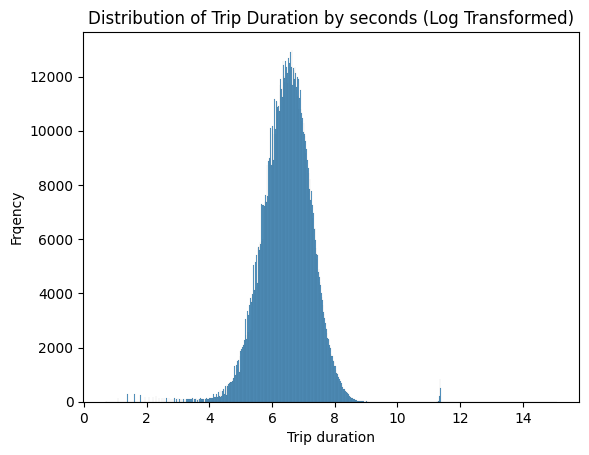

In [48]:
taxi_data['trip_by_seconds_Log_Transformed'] = np.log1p(taxi_data['trip_duration'].values) # we perform the lop1p transform to can Visualise better.
fig = sns.histplot(taxi_data['trip_by_seconds_Log_Transformed'] ,label = "Trip duration")
plt.title('Distribution of Trip Duration by seconds (Log Transformed)')
plt.xlabel('Trip duration')
plt.ylabel('Frqency')
plt.show()

* There is a long tail at right side: This means that there are a few very long trips that are outliers compared to the majority of trips.

* The peak of the distribution is around 5: this means that most trips are between 150 seconds and 1000 seconds (about 2.5 and 16.7 minutes) long.


Note : we use np.expm1 to convert to seconds.

In [49]:
taxi_data.drop(columns=['id'],axis=1,inplace=True) # drop id Variable.

<a id="Discrete Numerical Feature"></a>

## Discrete Numerical Feature


In [50]:
categorical_vars = ["vendor_id", "passenger_count"]
for var in categorical_vars:
    print(f"{var} unique values: {taxi_data[var].unique()}")
    print(f"{var} value distribution:\n{taxi_data[var].value_counts()}\n")

vendor_id unique values: [2 1]
vendor_id value distribution:
vendor_id
2    657578
1    571741
Name: count, dtype: int64

passenger_count unique values: [1 5 2 4 3 6 0 7 8]
passenger_count value distribution:
passenger_count
1    871202
2    177073
5     65797
3     50470
6     40790
4     23932
0        51
7         3
8         1
Name: count, dtype: int64



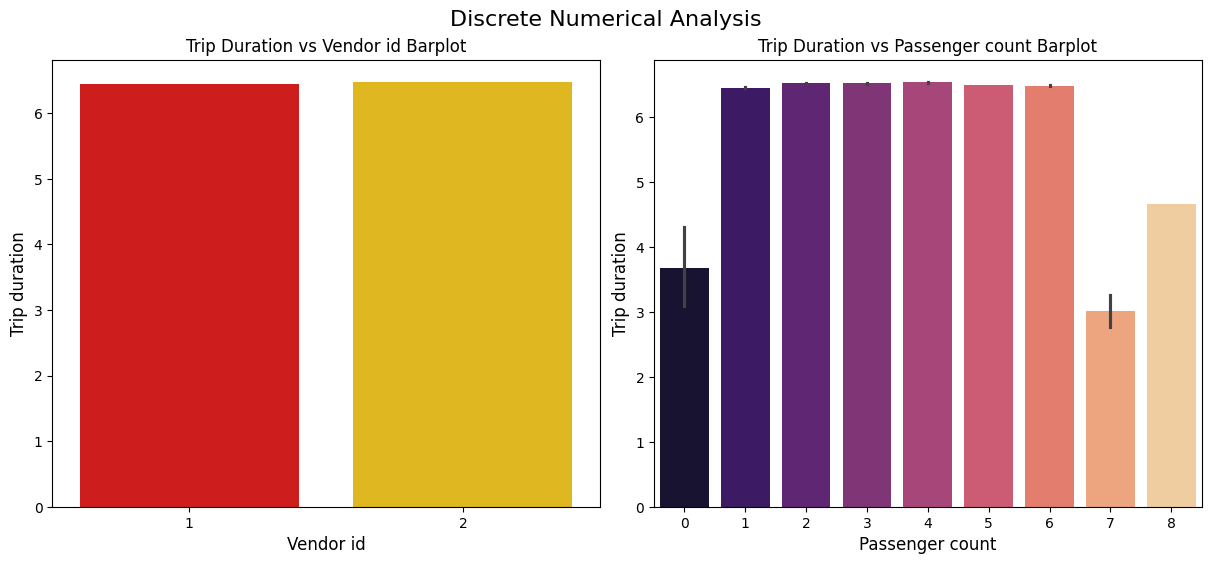

In [51]:
# Assuming 'trip_log' and 'df' are defined and ready to use

# Create the figure with GridSpec and specify the size
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
gs = GridSpec(2, 2, figure=fig)

# Subplot 1: Bar Plot for vendor_id
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(data=taxi_data, x="vendor_id", y= taxi_data['trip_by_seconds_Log_Transformed'], palette='hot', ax=ax1)
ax1.set_title('Trip Duration vs Vendor id Barplot')
ax1.set_xlabel("Vendor id", fontsize=12)
ax1.set_ylabel("Trip duration", fontsize=12)

# Subplot 2: Bar Plot for passenger_count
ax2 = fig.add_subplot(gs[0, 1])
sns.barplot(data=taxi_data, x=taxi_data["passenger_count"], y= taxi_data['trip_by_seconds_Log_Transformed'], palette='magma', ax=ax2)
ax2.set_title('Trip Duration vs Passenger count Barplot')
ax2.set_xlabel("Passenger count", fontsize=12)
ax2.set_ylabel("Trip duration", fontsize=12)

# Add a title for the entire figure
fig.suptitle("Discrete Numerical Analysis", fontsize=16)

# Show the plots
plt.show()

- Trip duration and Vendor ID: It's difficult to discern any clear patterns or trends between trip duration and vendor ID from the bar chart. The bars appear to be spread out relatively evenly across the x-axis, suggesting no significant difference in trip duration among vendors.

- When the number of passenger groups from [1 to 6] take constant trip duration and the number of passenger groups from [7 to 8] take less trip duration.

- Possible explanations:

  - Vehicle Capacity : It's possible that the vehicles used by both vendors have a maximum capacity of 6 passengers. When there are 6 or fewer passengers, the vehicles are operating at their maximum capacity, and the trip duration remains constant because the vehicles are fully utilized.

  - Vehicle Type : It's also possible that the two vehicle vendors have different types of vehicles in their fleet. One vendor might have larger vehicles capable of accommodating more passengers, while the other vendor might have smaller vehicles. The larger vehicles can comfortably accommodate 7 to 8 passengers, resulting in shorter trip durations.

  - Trip purpose: Trips with 7-8 passengers might be more likely to be for specific purposes (e.g., airport shuttle, group sightseeing) that involve shorter distances or routes optimized for efficiency.

- If **vendor of the taxi not effect with trip duration so idea of vehicle type and vehicle capacity not correct** so we need to use a boxplot
  to detect If we just dealing with some random noise or passengers groups from [7 to 8] just travel less than another groups.


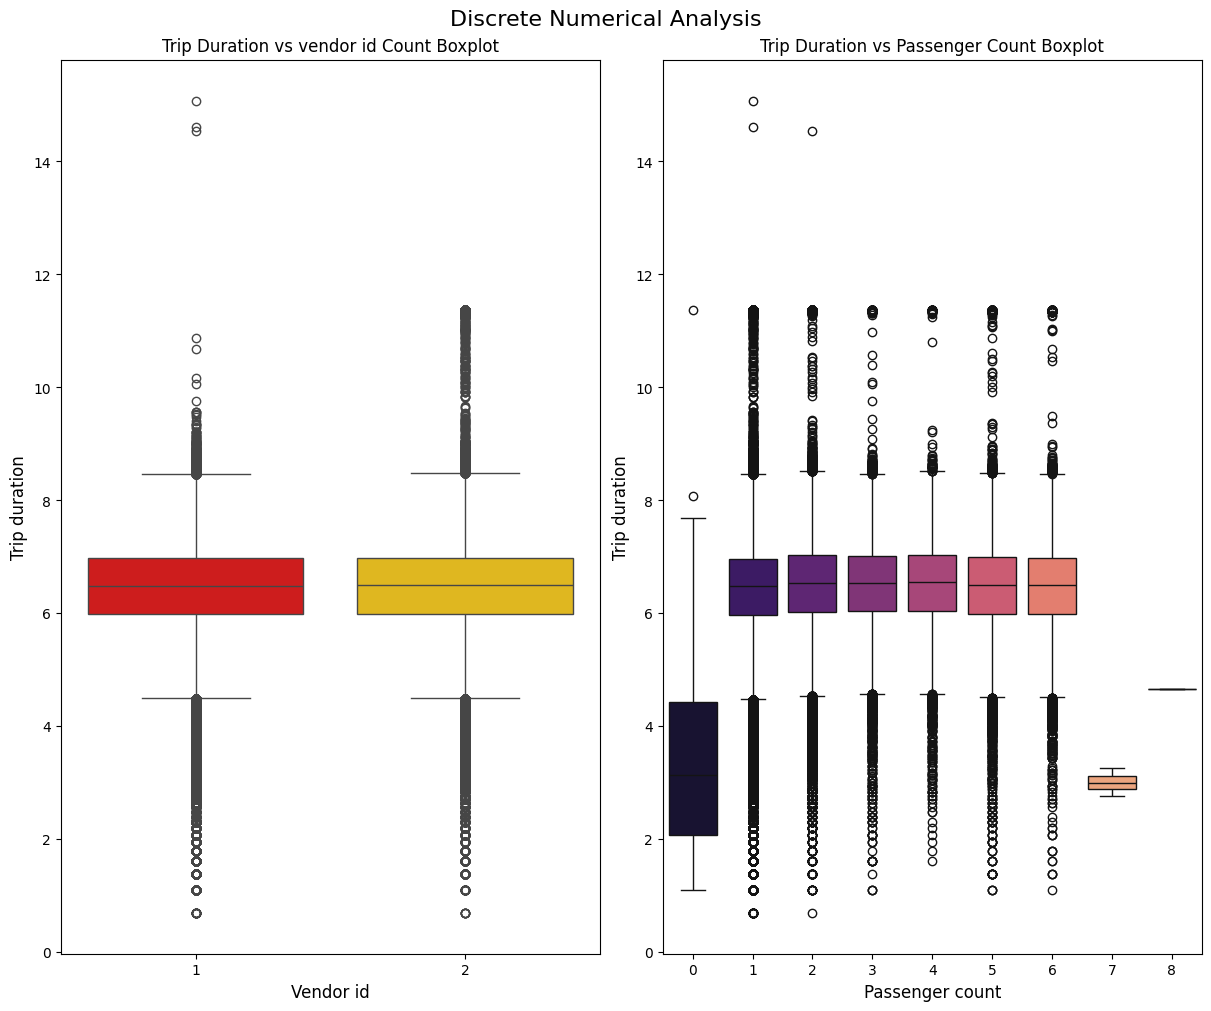

In [52]:
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
gs = GridSpec(1, 2, figure=fig)

# Subplot 1: Box Plot for vendor_id
ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(data=taxi_data, x="vendor_id", y= taxi_data['trip_by_seconds_Log_Transformed'], palette='hot', ax=ax1)
ax1.set_title("Trip Duration vs vendor id Count Boxplot")
ax1.set_xlabel("Vendor id", fontsize=12)
ax1.set_ylabel("Trip duration", fontsize=12)

# Subplot 2: Box Plot for passenger_count
ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(data=taxi_data, x="passenger_count", y= taxi_data['trip_by_seconds_Log_Transformed'], palette='magma', ax=ax2)
ax2.set_title("Trip Duration vs Passenger Count Boxplot")
ax2.set_xlabel("Passenger count", fontsize=12)
ax2.set_ylabel("Trip duration", fontsize=12)

# Add a title for the entire figure
fig.suptitle("Discrete Numerical Analysis", fontsize=16)

# Show the plots
plt.show()

- Trip duration distribution: The distribution of trip durations appears to be positively skewed for both groups, meaning there are more shorter trips than longer trips. This is especially evident for the group with lower passenger counts (left boxplot).
- Median trip duration: The median trip duration, represented by the horizontal line within the box, is longer for the group with higher passenger counts (right boxplot). This suggests that trips with more passengers tend to take longer overall.

- Outliers: There are a few outliers for both groups, represented by the circles beyond the whiskers. These are individual trips that were much longer than the majority of trips in their respective groups and this **Support conclusion passengers groups from [7 to 8] just travel less than another groups because Trip purpose**.


<a id="Categorical variable"></a>

## Categorical variable


In [53]:
for col in taxi_data.columns: 
    if taxi_data[col].dtype == "object" and (col not in ["pickup_datetime","dropoff_datetime"]):
        categorical_vars.append(col)

print("Categorical variables :: \n\n{}".format(categorical_vars)) 


Categorical variables :: 

['vendor_id', 'passenger_count', 'store_and_fwd_flag']


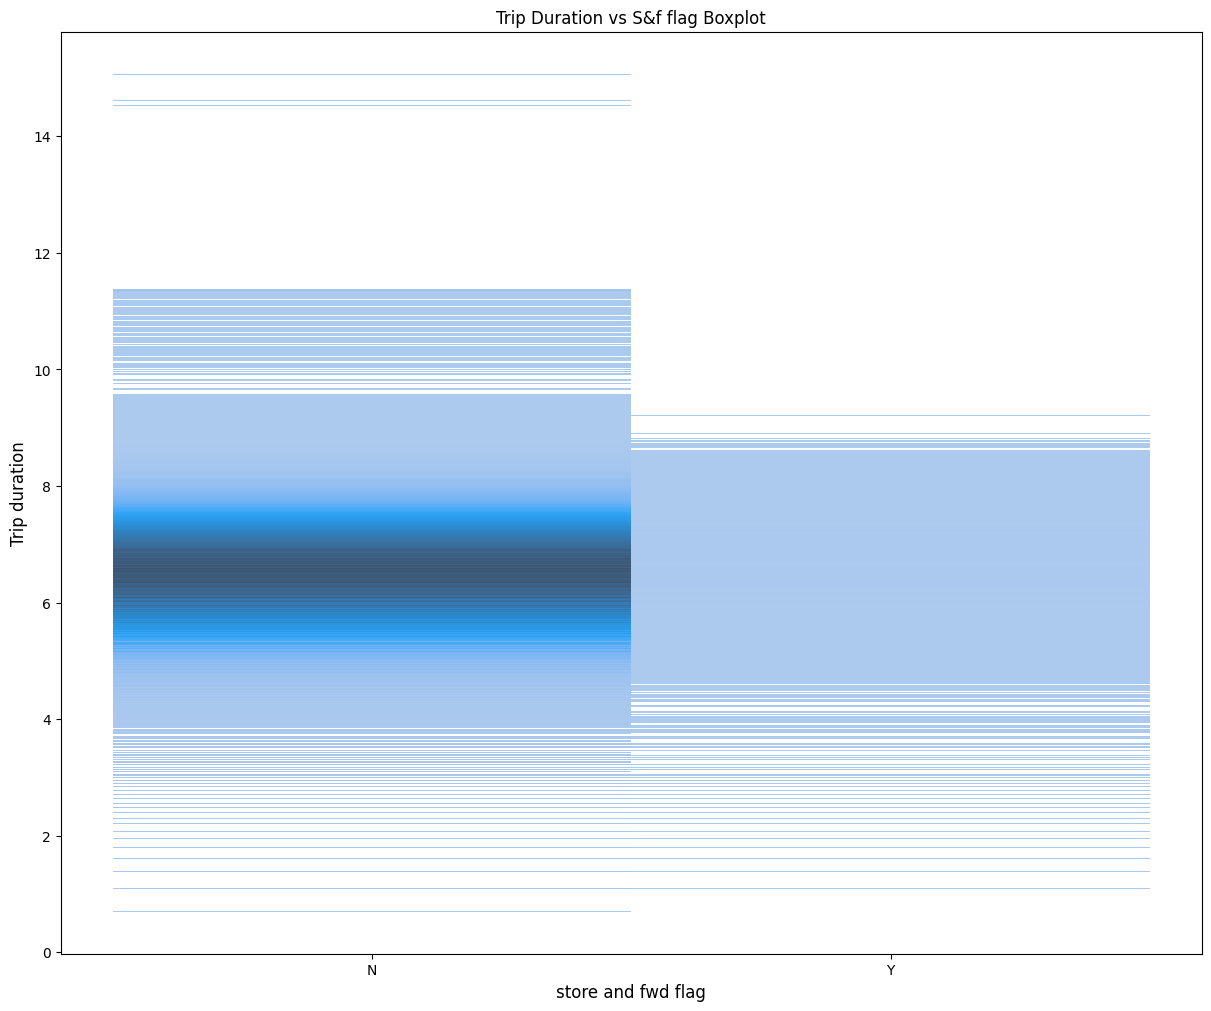

In [54]:
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
gs = fig.add_gridspec(1, 1)  

ax = fig.add_subplot(gs[0, 0])  # Add a single subplot
sns.histplot(data=taxi_data, x='store_and_fwd_flag', y=taxi_data['trip_by_seconds_Log_Transformed'], palette='magma', ax=ax)
ax.set_title('Trip Duration vs S&f flag Boxplot')
ax.set_xlabel('store and fwd flag', fontsize=12)
ax.set_ylabel('Trip duration', fontsize=12)

plt.show()

- Most taxi trips are sent to the vendor in real-time ("N").
- The most trips sent to the vendor in real-time ("N") likey take more Trip duration.


<a id="Geographical Data"></a>

## Geographical Data

Now lets to analysis Latitude and longitude are geographical coordinates


In [55]:
Geo_df = pd.DataFrame()

def haversine_distance(df):
    pick = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    dist = distance.geodesic(pick, drop).km
    return dist

Geo_df['distance'] = taxi_data.apply(haversine_distance, axis=1) # get the totall distance from Latitude and longitude coordinates


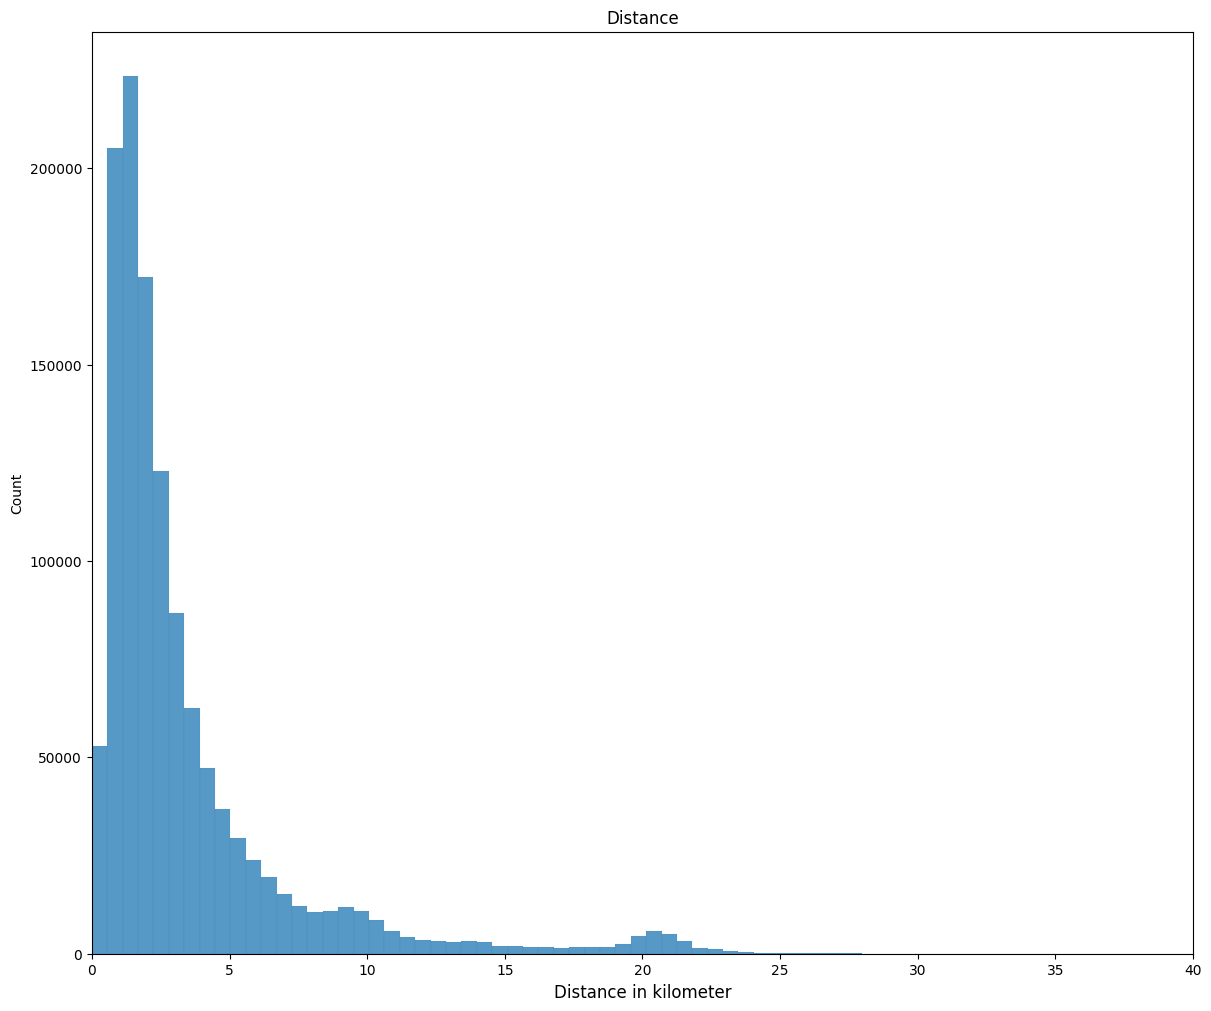

In [56]:
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
gs = fig.add_gridspec(1, 1)  
ax = fig.add_subplot(gs[0, 0])  # Add a single subplot

sns.histplot(data=Geo_df, x='distance', palette='magma', ax=ax)
ax.set_title('Distance')
ax.set_xlabel('Distance in kilometer', fontsize=12)
plt.xlim(0, 40)
plt.show()

- Looks like most of trip goes from less then 1 kile meter to 25 kilometer
- The shape of histgram right skewed (we can use a log transformation to make it more normal distributed to help our linear model).


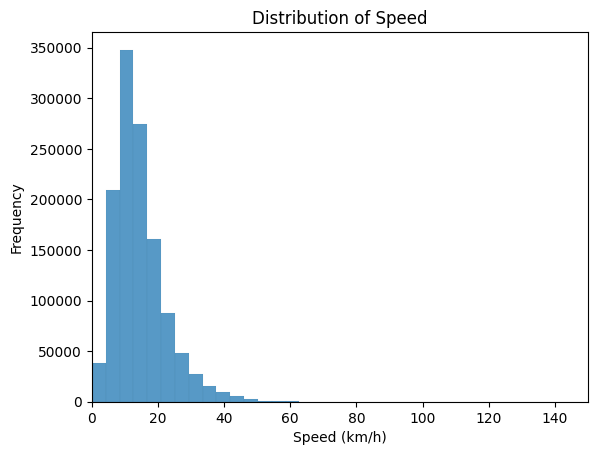

In [57]:
Geo_df['speed_kmh']= Geo_df['distance']/(taxi_data['trip_duration']/(60*60)) # Speed = distance / time

# Create the histogram plot
sns.histplot(Geo_df['speed_kmh'])
# Set the x-axis limit to the desired range
plt.xlim(0, 150)
# Add labels and title (optional)
plt.xlabel('Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Distribution of Speed')
plt.show()

- Most of the trip goes at a speed in the range 1-40 Km/h.
- The shape of the data is skewness in the right side.


<a id="Temporal/Time-date Analysis"></a>

## Temporal/Time-date Analysis


In [58]:
# Correct formatting date and time.

taxi_data["pickup_datetime"] = pd.to_datetime(taxi_data["pickup_datetime"])

In [59]:
# Now from every data/time we can get a new information like Months/day/ Morning or afternoon or night / season for each trip
# Example of extracting additional information from the "pickup_datetime" column
df_date_time = pd.DataFrame()        

df_date_time["pickup_month"] = taxi_data["pickup_datetime"].dt.month
df_date_time["pickup_day"] = taxi_data["pickup_datetime"].dt.day
df_date_time["pickup_hour"] = taxi_data["pickup_datetime"].dt.hour
df_date_time["pickup_dayofweek"] = taxi_data["pickup_datetime"].dt.dayofweek
df_date_time["pickup_quarter"] = taxi_data["pickup_datetime"].dt.quarter
df_date_time["trip_duration"] = taxi_data['trip_by_seconds_Log_Transformed']

bins = [0, 2, 5, 8, 11, 12]  # 0, 2, 5, 8, 11, 12 represent the starting and ending months of each season
labels = ['Winter', 'Spring', 'Summer', 'Autumn', 'Winter']  # Labels for each season


def get_time_period(hour):
    if 5 <= hour < 12:   # Morning: 5 AM to 11:59 AM
        return "Morning"
    elif 12 <= hour < 17:   # Afternoon: 12 PM to 4:59 PM
        return "Afternoon"
    else:   # Night: 5 PM to 4:59 AM (next day)
        return "Night"

# Create a new column 'Season' using pd.cut()
df_date_time['pickup_Season'] = pd.cut(df_date_time["pickup_month"] , bins=bins, labels=labels, right=False,ordered=False) 
# This Colums just to make it Easier to understand the relationship with weather seasons witha trip duration

df_date_time["time_period"] = df_date_time["pickup_hour"].apply(get_time_period)

day_names = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_date_time['pickup_dayofweek_ch'] = df_date_time['pickup_dayofweek'].map(lambda x: day_names[x])

df_date_time.head(5)

,pickup_month,pickup_day,pickup_hour,pickup_dayofweek,pickup_quarter,trip_duration,pickup_Season,time_period,pickup_dayofweek_ch
0,6,8,7,2,2,6.947937,Summer,Morning,Monday
1,4,3,12,6,2,6.719013,Spring,Afternoon,Friday
2,6,5,2,6,2,6.421622,Summer,Night,Friday
3,5,5,17,3,2,6.766192,Summer,Night,Tuesday
4,5,12,17,3,2,8.510773,Summer,Night,Tuesday


### Now lets try to see Relationship between Trip duration vs Trip_Season & Trip timeperiod


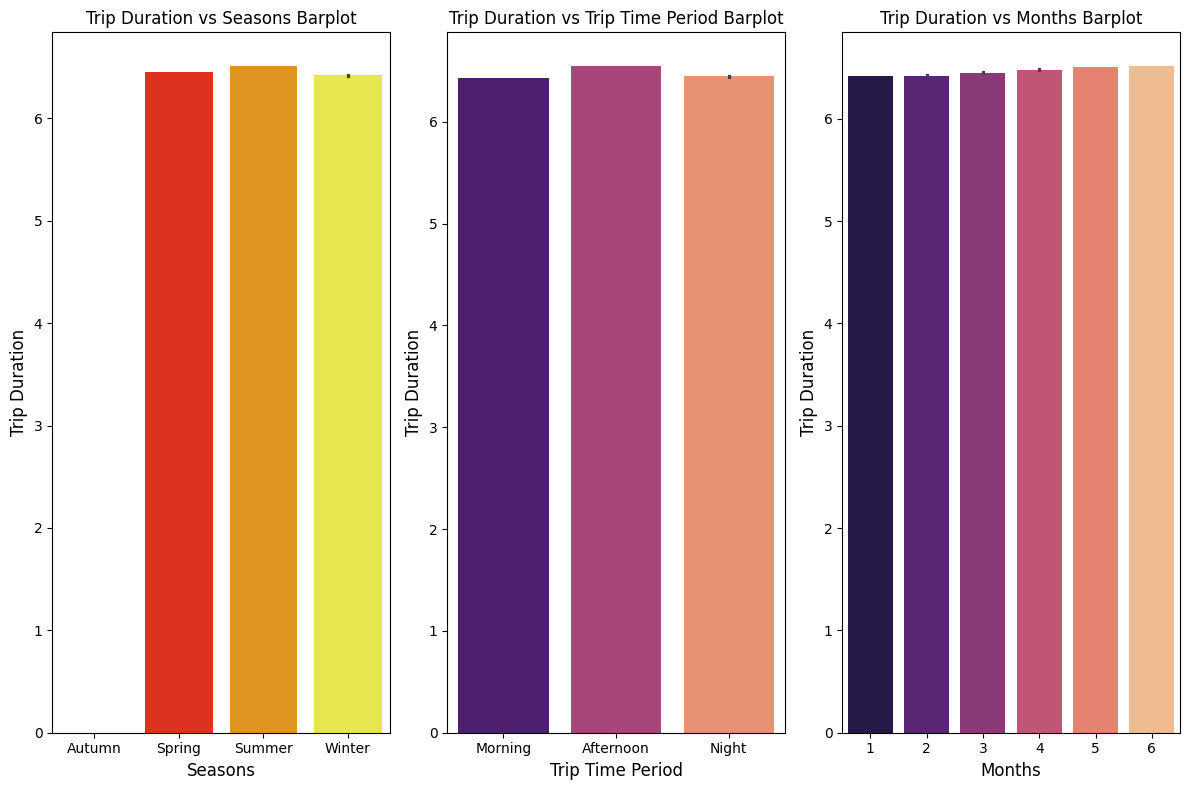

In [60]:
# Create the figure with GridSpec and specify the size
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

# Subplot 1: Bar Plot for Seasons
sns.barplot(data=df_date_time, x="pickup_Season", y=taxi_data['trip_by_seconds_Log_Transformed'], palette='hot', ax=ax1)
ax1.set_title('Trip Duration vs Seasons Barplot')
ax1.set_xlabel("Seasons", fontsize=12)
ax1.set_ylabel("Trip Duration", fontsize=12)

# Subplot 2: Bar Plot for time period
sns.barplot(data=df_date_time, x="time_period", y=taxi_data['trip_by_seconds_Log_Transformed'], palette='magma', ax=ax2)
ax2.set_title('Trip Duration vs Trip Time Period Barplot')
ax2.set_xlabel("Trip Time Period", fontsize=12)
ax2.set_ylabel("Trip Duration", fontsize=12)

# Subplot 3: Bar Plot for months
sns.barplot(data=df_date_time, x="pickup_month", y=taxi_data['trip_by_seconds_Log_Transformed'], palette='magma', ax=ax3)
ax3.set_title('Trip Duration vs Months Barplot')
ax3.set_xlabel("Months", fontsize=12)
ax3.set_ylabel("Trip Duration", fontsize=12)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()

- The longer trip durations during summer might be attributed to vacations and holidays, which lead to increased traffic on the roads.
- Longer trip durations in the afternoon can be explained by higher levels of crowding during that time of day.
- April, May, and July experience longer trip durations compared to other months.


Text(0.5, 1.0, 'Trip duration per day of week per hour of day')

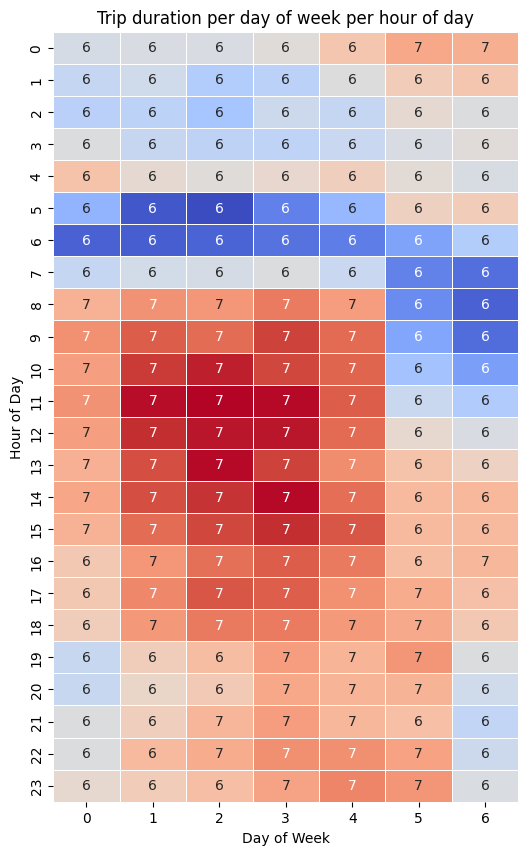

In [61]:
table = pd.pivot_table(
    df_date_time, 
    values='trip_duration', 
    index='pickup_hour',
    columns='pickup_dayofweek', 
    aggfunc="median"
)

plt.figure(figsize=(6,10))
ax = sns.heatmap(table, annot=True, fmt='.0f', cmap='coolwarm', linewidths='0.5', cbar=False)
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.title('Trip duration per day of week per hour of day')

- Trip durations are generally longer on weekends than on weekdays. This is likely due to the fact that people are more likely to take longer trips for leisure purposes on weekends.

- Trip durations are generally shorter during the morning and evening rush hours. This is likely due to the fact that people are more likely to be making shorter trips for commuting purposes during these times.

- Trip durations are generally longer in the middle of the day. This is likely due to the fact that people are more likely to be making longer trips for shopping, errands, or other activities during these times.


<a id="Correlation Analysis"></a>

# Correlation Analysis


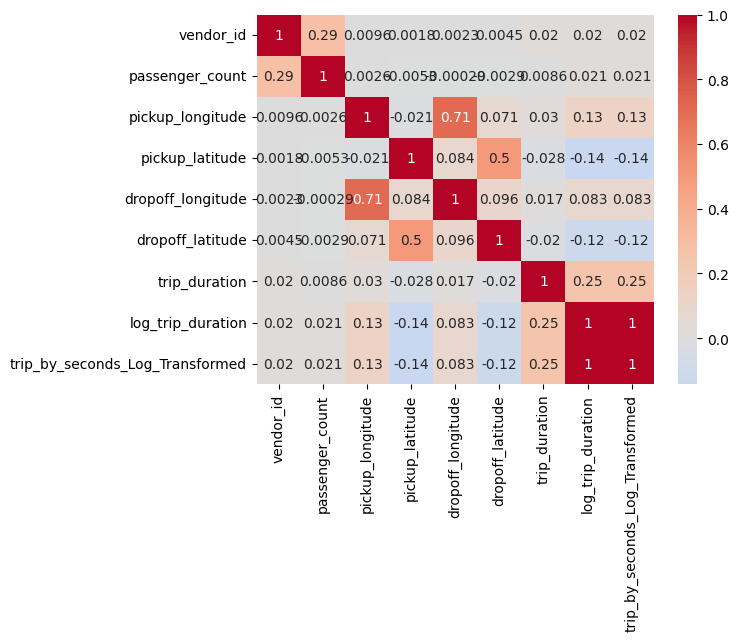

In [62]:
correlation_matrix = taxi_data.drop(["pickup_datetime", "store_and_fwd_flag"], axis=1, inplace=False).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

- There posstive relation trip duration (in Seconds log-Transformed) with pickup longitude ,dropoff longitude and passenger count.

- There negative relation trip duration (in Seconds log-Transformed) with pickup latitude and dropoff latitude.


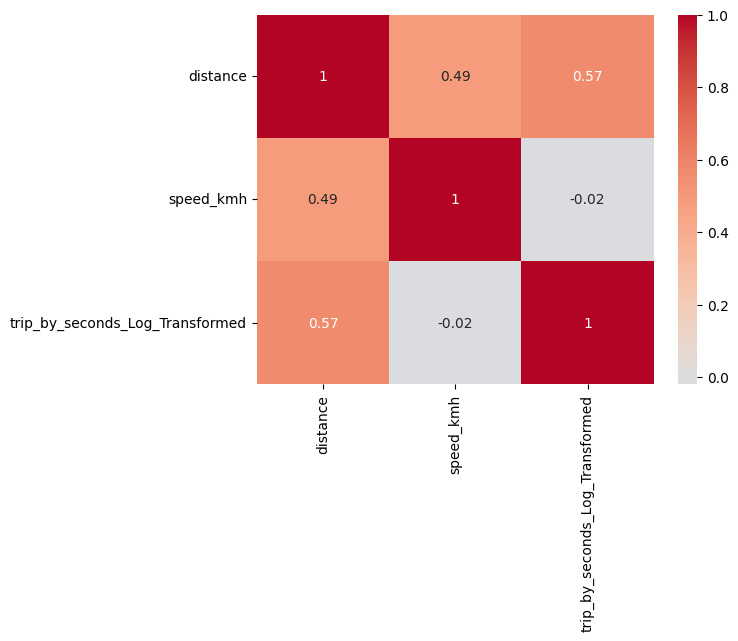

In [63]:
Geo_df["trip_by_seconds_Log_Transformed"] = taxi_data["trip_by_seconds_Log_Transformed"]
correlation_matrix = Geo_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

- There strong posstive relation trip duration (in Seconds log-Transformed) with distance.

- There negative relation trip duration (in Seconds log-Transformed) with speed kmh.


We observe a strong relationship between the distance features and trip duration, making them valuable for modeling.

However, caution is required since this relationship may introduce data leakage.